# 1 Load the Libraies 

In [47]:
import os
import sys
import argparse
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Standard functions

In [48]:
def sigmoid (w, x):
    y = np.dot (w, x)
    return 1.0/(1.0 + np.exp(-y))

def cross_entropy(x, y):
   ce =  np.sum(-y * np.log(x) - (1 - y) * np.log(1 - x))
   return ce/y.shape[0]


# 2 Create Synthetic data 

In [57]:
#create the data or read 
def get_data ():
   # two dimensional gaussian data 
   cov = [[4, 0.75], [0.75, 4]]
   x1 = np.random.multivariate_normal((50, 60), cov,100)
   x2 = np.random.multivariate_normal((55, 65), cov,100)
   df = pd.DataFrame(columns=['weight','height','gender'])
   count = 0
   for i in range(0, len(x1)):
      df.loc[count] = [x1[i,0], x1[i,1], 0]
      count +=1
   for i in range(0, len(x2)):
      df.loc[count] = [x2[i,0], x2[i,1], 1]
      count +=1
   return df.sample(frac=1) 


# 4 Performance matrices 

In [58]:

def score(y, y_p):
    y = y.reshape (y.shape[0])
    y = np.array([int(t) for t in y])
    TP, FP, TN, FN = 0,0,0,0
    for i in range (0, y.shape[0]):
       if y[i] == 1:
           if y_p[i] == 1:
             TP +=1
           else:
             FN +=1
       else :
           if y_p [i] == 1:
             FP +=1
           else:
             TN +=1     
    accuracy = (TP+TN)/(TP+FP+TN+FN)            
    return {'TP':TP,'TN':TN,'FP':FP,'FN':FN,'acc':accuracy} 


def get_roc(X, model):
    p  =  np.arange(0.1,0.9,0.01)
    df_roc = pd.DataFrame (columns=["threshold","true_positive",\
       "false_positive","true_negative","false_negative"])

    count = 0
    tp = []
    fp = []
    for p_cut in p:
       y_p  = model.predict_class (X, p_cut=p_cut)
       sc = score (y, y_p)
       t = "{:10.2f}".format(p_cut)
       df_roc.loc[count] = [t, sc['TP'], sc['FP'], sc['TN'],sc['FN']]
       tp.append (sc['TP'])
       fp.append (sc['FP'])
       count +=1
    return df_roc 


# 5. The Model 

In [59]:
class LogReg:
   def __init__(self, ndim, max_iter=1000, lr=0.0007):
      self.ndim = ndim 
      self.w = np.random.random([ndim])/1000.0
      self.iter = max_iter 
      self.lr = lr  
      self.thrs = 0.76 
      self.loss = cross_entropy 

    
   def fit(self, x, y):
      y = y.reshape(y.shape[0])       
      history = pd.DataFrame (columns=['iter','loss']) 
      for i in range (0, self.iter):
          h = self.predict (x)
          grad = np.dot (X.T, h-y) /y.shape[0]
          self.w  -= self.lr * grad 
          history.loc[i] = [i,  self.loss(h,y)]
      return history   

    
   def predict (self, x):
      h = np.array ([sigmoid (self.w, x[i,:])\
         for i in range(0, x.shape[0])])
      return h  

    
   def predict_class (self, x, p_cut):
      h = self.predict (x)
      y = [0 if p < p_cut else 1 for p in h]
      return np.array(y)


# 5 Main program 

(200, 3) Index(['weight', 'height', 'gender'], dtype='object')
(100,) (100,)


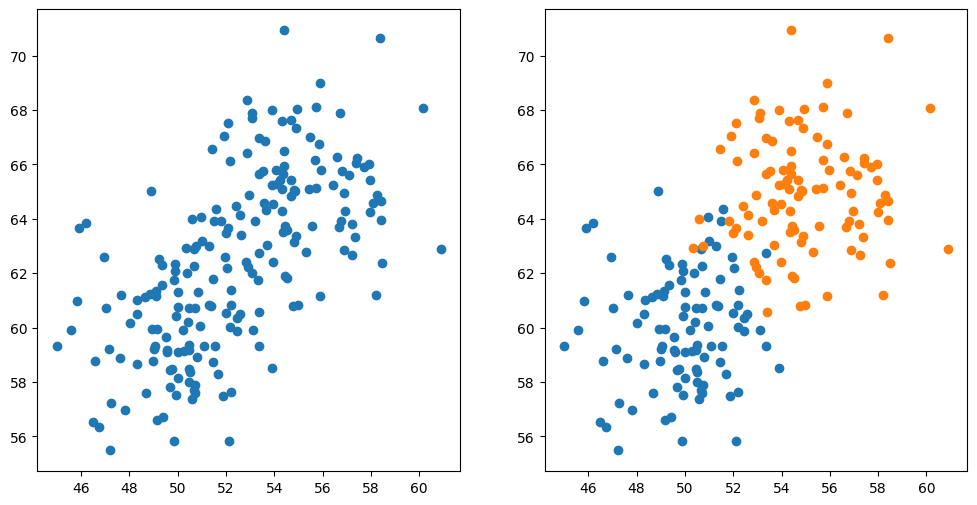

(200, 2) (200,)


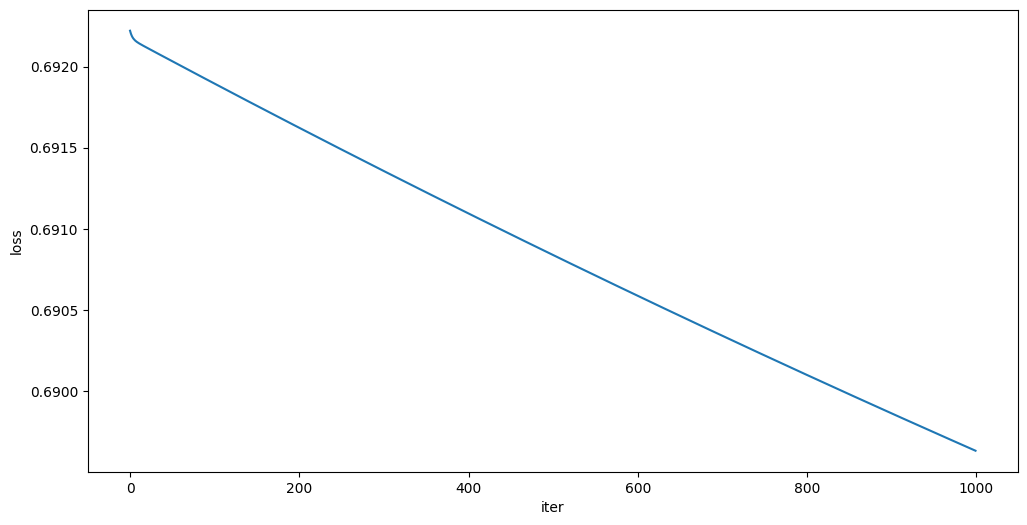

Index(['threshold', 'true_positive', 'false_positive', 'true_negative',
       'false_negative'],
      dtype='object') (80, 5)


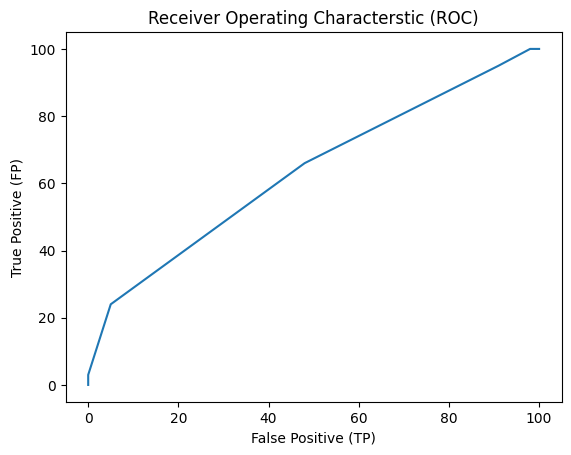

In [60]:

if __name__ == "__main__":
    df = get_data ()
    print(df.shape, df.columns) 
    
    df1 = df[df['gender'] == 0.0]
    df2 = df[df['gender'] == 1.0]

    print(df1['height'].to_numpy().shape, df1['weight'].to_numpy().shape)
    fig, axs = plt.subplots (1,2,figsize=(12,6))
    axs[0].scatter (df['weight'].to_numpy(), df['height'].to_numpy())
    axs[1].scatter (df1['weight'].to_numpy(), df1['height'].to_numpy(), label='Class 0')
    axs[1].scatter (df2['weight'].to_numpy(), df2['height'].to_numpy(), label='Class 1')
    plt.show()    

    X = df[['weight','height']].to_numpy()
    y = df['gender'].to_numpy()
    
    print(X.shape, y.shape)

    # This is the model object 
    niter = 1000
    learning_rate = 0.0001
    model = LogReg (X.shape[1], niter, learning_rate)

    # Fit the data 
    df_h = model.fit(X, y)

    fig, axs = plt.subplots (1,1,figsize=(12,6))
    axs.plot(df_h['iter'], df_h['loss'])
    axs.set_xlabel('iter')
    axs.set_ylabel('loss')
    plt.show()

    df_roc = get_roc(X, model) 
    print(df_roc.columns, df_roc.shape)

    plt.plot(df_roc['false_positive'], df_roc['true_positive'])
    plt.title("Receiver Operating Characterstic (ROC)")
    plt.xlabel("False Positive (TP)")
    plt.ylabel("True Positive (FP)")
    #plt.savefig(outdir + os.sep + "roc.pdf")
    plt.show()
    
   